In this module, we study how to generate word clouds, which are cool visualization techniques when it comes to NLP problems. We will also lay the foundation for a more systematic treatment of NLP problem by introducing word frequency counts. We will use a wine review dataset taking from 'Wine Enthusiast website' to learn:

   1. how to create a basic word cloud from one to several text documents;
   2. adjust color, size and number of text inside your wordcloud;
   3. mask your word cloud into any shape of your choice.
   
The main package we will be using includes 'pillow' as well as 'wordcloud', which needs to be installed via pip (conda install -c conda-forge wordcloud). Besides these, the NLTK package is also a must-load package in Python when it comes to NLP problems. 

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import string
import nltk
import re

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import blankline_tokenize
from nltk.util import ngrams
from nltk.probability import FreqDist

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [52]:
warnings.filterwarnings("ignore")

# path="C:\\Users\\GAO\\GAO_Jupyter_Notebook\\Datasets"
path='C:\\Users\\pgao\\Documents\\PGZ Documents\\Programming Workshop\\PYTHON\\Open Courses on Python\\Udemy Course on Python\\Introduction to Data Science Using Python\\datasets'
os.chdir(path)

We now reads the data in. This dataset, which can be downloaded from Kaggle, is a great dataset for learning with no almost no missing values and a lot of texts (wine reviews). It also contains a rich source of both categorical and numerical data.

In [54]:
filename="winemag-data-130k-v2.csv"
df = pd.read_csv(filename, index_col=0) # we don't read in row name (index) as a separated column
df.head(4)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian


### I. EDA

We first do some explorary data analysis. We first look at records count as well as features count. Then we will look at how many types of wines are there in the data:

In [56]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))
print("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()),", ".join(df.variety.unique()[0:5])))

There are 129971 observations and 13 features in this dataset. 

There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir... 



Let's look at the summary statistics by country of origin for the wines and look at how many types of wine per each country. We will also quickly evaluate their points (scale of appreciation) for wines, and see which country produces the best and biggest varieties of wines:

In [58]:
country = df.groupby("country") 
country.describe().head() # summary statistic of all countries

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

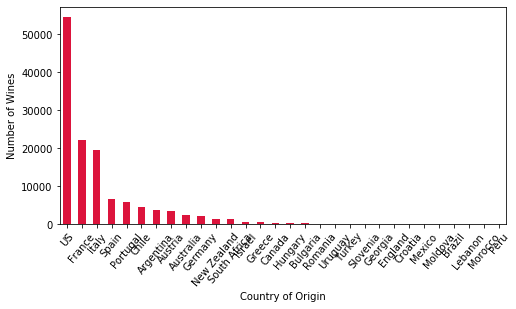

In [60]:
plt.figure(figsize=(8,4))
country.size().sort_values(ascending=False).head(30).plot.bar(color='crimson')
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

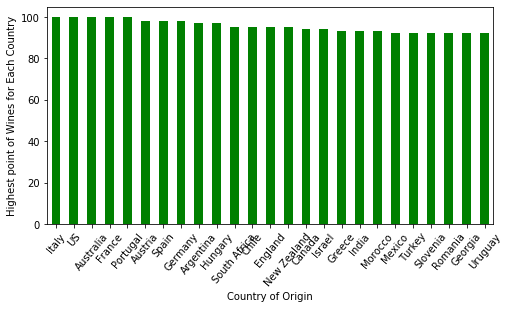

In [62]:
plt.figure(figsize=(8,4))
country = df.groupby("country")
country['points'].max().sort_values(ascending=False).head(25).plot.bar(color='green')
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines for Each Country")
plt.show()

Now let's get the word cloud. We start with one particular review. And then we generate a basic word cloud:

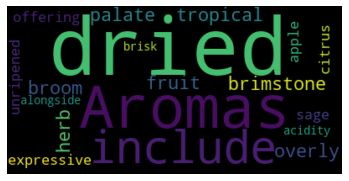

In [64]:
text = df.description[0] # starting with one particular review

wordcloud = WordCloud().generate(text) # creating and generating a wordcloud image

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() # displaying the generated image

We can add some customization to the wordcloud display by changing some of its parameters:

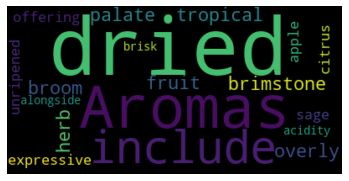

In [66]:
wc = WordCloud(max_font_size=50, max_words=80,background_color="white").generate(text) # lowering max_font_size, changing the maximum number of word and lightening the background
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [68]:
wordcloud.to_file("first_review.png") # saving the image in the folder

Now let's do a more comprehensive review of wordcloud. First, we concatenate all the reviews in one giant chunk of text. And then we remove stopwords, those words that always show up but do not have too many intrinsic meannings. And then we generate the wordcloud again:

In [70]:
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 31661073 words in the combination of all review.


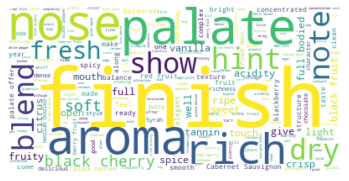

In [72]:
stopwords = set(STOPWORDS) # creating stopword list
stopwords.update(["drink", "now", "wine", "flavor", "flavors"]) # adding more words to the existing stopwords list

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can even do more cool visualization than what the basic wordcloud functionality can offer. For example, we can create a shape for our wordcloud; to do this, first, we need to find a PNG file to become the mask. Below is a nice one that is available on the internet:

<class 'numpy.ndarray'>
(729, 643, 4)


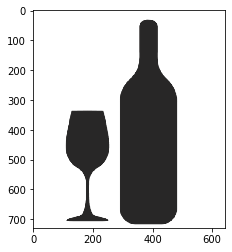

In [74]:
wine_mask = np.array(Image.open("wineglass mask.png"))
print(type(wine_mask))
print(wine_mask.shape)

plt.imshow(wine_mask, interpolation='nearest')
plt.show()

We have a blank simple background file like this. The goal is to put the words within that bottle. In other words, we need a notion of 'masking'. The way the masking functions works is that it requires all white part of the mask be 255 not 0 (integer type). This value represents the "intensity" of the pixel. Values of 255 are pure white, whereas values of 1 are black. Here, we can use the provided function below to transform your mask if our mask has the same format as above. Notice if we have a mask that the background is not 0, but 1 or 2, we need to adjust the function.

In [76]:
wine_mask[wine_mask == 0 ] = 255 # setting everything to chromatic

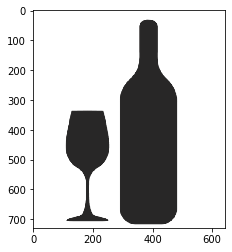

In [78]:
plt.imshow(wine_mask, interpolation='nearest')
plt.show()

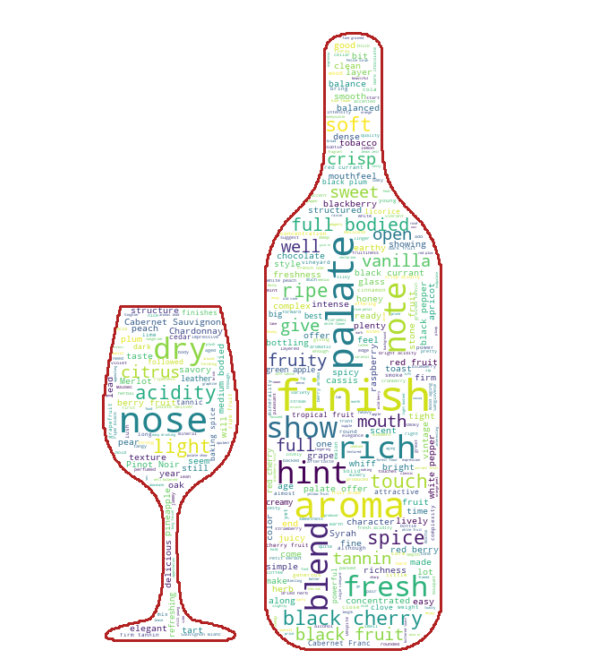

In [80]:
wc = WordCloud(background_color="white", max_words=1000, mask=wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick') # creating the wordcloud image

wc.generate(text) # generating a wordcloud

wc.to_file("wine.png") # storing to file

plt.figure(figsize=[18,12])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### II. String Methods and Tokenization

Getting a good visualization from the word cloud is important. But in many times, we need to quantify words and phrases. This is where tokenization kicks in. The process of breaking down a text paragraph into smaller chunks such as words or sentence is called **tokenization**. A token is a single entity that is building blocks for our analysis. A token could be strings, punctuations, words, phrases, sentences or paragraphs. How we define a token depends on the nature of our analysis.

There are two different approaches to tokenization. One is to use existing functions of NLTK. The other one is to use string associated methods. The idea is that we need to break the texts into arbitrary chunks of interest according to our study needs and each chunk is a unit of analysis. 

We first go over string methods and then we learn how to tokenize words, sentences, or blank lines ("\n\n"). 

In [82]:
mytext1="""Hello,\n\n  My name is John Doe, and I have question related to your product. Can you give me a call at the number below? Your help is much appreciated!! \n\n Yours, \r\n John Doe \n M.B.A, PhD \n\r Tel: 312-985-3343 \n\r John.Doe@greatcorp.com"""
print(mytext1)

Hello,

  My name is John Doe, and I have question related to your product. Can you give me a call at the number below? Your help is much appreciated!! 

 Yours, 
 John Doe 
 M.B.A, PhD 
 Tel: 312-985-3343 
 John.Doe@greatcorp.com


In [84]:
t1=mytext1.split('\n') # using the newline separator
print(t1)

['Hello,', '', '  My name is John Doe, and I have question related to your product. Can you give me a call at the number below? Your help is much appreciated!! ', '', ' Yours, \r', ' John Doe ', ' M.B.A, PhD ', '\r Tel: 312-985-3343 ', '\r John.Doe@greatcorp.com']


In [86]:
t2=mytext1.split('\r\n') # using '\r\n' as the separator, so neither '\n\n' nor '\n' is not a separator
print(t2)
len(t2)

['Hello,\n\n  My name is John Doe, and I have question related to your product. Can you give me a call at the number below? Your help is much appreciated!! \n\n Yours, ', ' John Doe \n M.B.A, PhD \n\r Tel: 312-985-3343 \n\r John.Doe@greatcorp.com']


2

To remove those leading and trailing blanks, we can use the strip() method:

In [88]:
t3=[l.strip() for l in t1]
print(t3)

['Hello,', '', 'My name is John Doe, and I have question related to your product. Can you give me a call at the number below? Your help is much appreciated!!', '', 'Yours,', 'John Doe', 'M.B.A, PhD', 'Tel: 312-985-3343', 'John.Doe@greatcorp.com']


This type of tokenization requires that we understand string methods very well in Python. So let's study more on string methods. First, for display purpose, in many times, strings go over several lines. Python provides us with various ways of entering them. In the next example, a sequence of two strings is joined into a single string. We need to use backslash sign or parentheses so that the interpreter knows that the statement is not complete after the first line:

In [90]:
couplet1 = "Shall I compare thee to a Summer's day?"\
           "Thou are more lovely and more temperate:" 
print(couplet1)

couplet2 = ("Rough winds do shake the darling buds of May, "
            "And Summer's lease hath all too short a date:") 
print(couplet2)

Shall I compare thee to a Summer's day?Thou are more lovely and more temperate:
Rough winds do shake the darling buds of May, And Summer's lease hath all too short a date:


Unfortunately the above methods do not give us a newline between the two lines of the sonnet. Instead, we can use a triple-quoted string as follows. Notice that spaces do matter:

In [92]:
couplet3 = """Shall I compare thee to a Summer's day?
Thou are more lovely and more temperate:"""
print(couplet3)

couplet4 = """
        Shall I compare thee to a Summer's day?
    Thou are more lovely and more temperate:
           """ 
print(couplet4)

Shall I compare thee to a Summer's day?
Thou are more lovely and more temperate:

        Shall I compare thee to a Summer's day?
    Thou are more lovely and more temperate:
           


Here are some common methods associated with strings. Assume below, "s" stands for a generic string:
   - s.find(t):	index of first instance of string t inside s (-1 if not found)
   - s.rfind(t): index of last instance of string t inside s (-1 if not found)
   - s.index(t): like s.find(t), except it raises ValueError if not found
   - s.rindex(t): like s.rfind(t) except it raises ValueError if not found
   - s.join(text): combines the words of the text into a string using s as the glue
   - s.split(t): splits s into a list wherever a t is found (whitespace by default)
   - s.splitlines():, splits s into a list of strings, one per line
   - s.title(): a titlecased version of the string s
   - s.strip(): a copy of s without leading or trailing whitespace
   - s.replace(t, u): replaces instances of t with u inside s

Strings also are intimately related to word patterns through regular expressions. For example, let's find words ending with the suffix _ed_ using regular expressions:

In [94]:
wordlist=['abaissed', 'abandoned', 'abased', 'abashed', 'aborted', 
          'blanket', 'euthanasia', 'kleptomania', "abjectly", 
          'email', 'e-mail', 'emails', 'e-mails']

In [96]:
[w for w in wordlist if re.search('ed$', w)]

['abaissed', 'abandoned', 'abased', 'abashed', 'aborted']

The wildcard dot symbol "." matches any single character. Suppose we have room in a crossword puzzle for an 8-letter word with j as its third letter and t as its sixth letter. In place of each blank cell we use a period:

In [98]:
[w for w in wordlist if re.search('^..j..t..$', w)]

['abjectly']

Additionally, the question mark "?" specifies that the previous character is optional. Thus:

In [100]:
[w for w in wordlist if re.search('^e-?mail$', w)] # the hyphen after the letter 'e' and before the letter 'm' is optional

['email', 'e-mail']

Here are some common regex expressions:

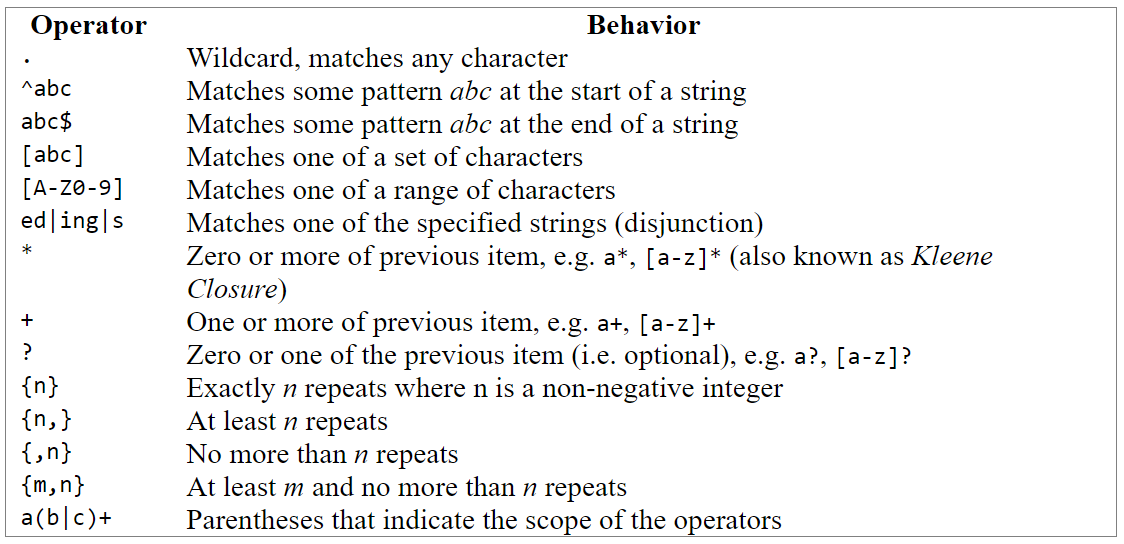

In [102]:
from IPython.display import Image
Image("common regex from NLTK book.PNG", width=400, height=400)

Regular expressions are very useful when we tokenize texts. For example from below, whenever we see either '\n' or '\r', we use that as a separator. In other words, we can be more flexible when it comes to separators through the use of multiple delimiters to split through regex:

In [104]:
t4=re.split(r'[\n\r]+', mytext1) # same as r'[\r\n]+'
print(t4)

['Hello,', '  My name is John Doe, and I have question related to your product. Can you give me a call at the number below? Your help is much appreciated!! ', ' Yours, ', ' John Doe ', ' M.B.A, PhD ', ' Tel: 312-985-3343 ', ' John.Doe@greatcorp.com']


Here is another example below. This time we will split by words rather than special indicators like tab, carriage return, or newline marks (all these are called escape characters):

In [106]:
raw = """'When I'M a Duchess\v,' she said to herself,\r(not in a very hopeful tone
though), 'I won't have any pepper in my kitchen AT ALL. Soup does very\n
well without--Maybe it's always\f pepper\nthat makes people hot-tempered,'..."""
print(raw)

(not in a very hopeful tone
though), 'I won't have any pepper in my kitchen AT ALL. Soup does very

well without--Maybe it's always pepper
that makes people hot-tempered,'...


In [108]:
print(re.split(r'[ \r\t\n]+', raw))

["'When", "I'M", 'a', "Duchess\x0b,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very', 'well', 'without--Maybe', "it's", 'always\x0c', 'pepper', 'that', 'makes', 'people', "hot-tempered,'..."]


The above examples use all 3 escape characters as delimiters for separation of tokens. Notice that there are also other escape characters that are not included. There is even a better way to recognize them:

In [110]:
print(re.split(r'\s+', raw)) # more comprehensive than above

["'When", "I'M", 'a', 'Duchess', ",'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very', 'well', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'..."]


The regular expression r'\s+' means any white space characters, including carriage-return, form-feed (indicated by '\f'), newlines, blank tab and vertical tab etc.

There are other ways to split the texts. For example, Python provides us with a character class "\w" for word characters, equivalent to "[a-zA-Z0-9_]". It also defines the complement of this class "\W", i.e. all characters other than letters, digits or underscore:

In [112]:
print(re.split(r'\W+', raw))

['', 'When', 'I', 'M', 'a', 'Duchess', 'she', 'said', 'to', 'herself', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', 'I', 'won', 't', 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', 'Soup', 'does', 'very', 'well', 'without', 'Maybe', 'it', 's', 'always', 'pepper', 'that', 'makes', 'people', 'hot', 'tempered', '']


Observe that this gives us empty strings at the start and the end. Also this time those abbreviations like _I'm_ are broken apart. The regular expression "\w+|\S\w*" will first try to match any sequence of word characters. If no match is found, it will try to match any non-whitespace character ("\S" is the complement of "\s") followed by further word characters. This means that punctuation is grouped with any following letters but that sequences of two or more punctuation characters are separated. Pushing one step further, let's generalize the "\w+" in the above expression to permit word-internal hyphens and apostrophes. Below, the expression means "\w+" followed by zero or more instances of "[-']\w+"; it would match then words such as_hot-tempered_ and the token _it's_. We'll also add a pattern to match quote characters so these are kept separate from the text they enclose:

In [114]:
print(re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", raw))

["'", 'When', "I'M", 'a', 'Duchess', ',', "'", 'she', 'said', 'to', 'herself', ',', '(', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', ')', ',', "'", 'I', "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '.', 'Soup', 'does', 'very', 'well', 'without', '--', 'Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', 'hot-tempered', ',', "'", '...']


Below is a table for common regex symbols in NLTK:

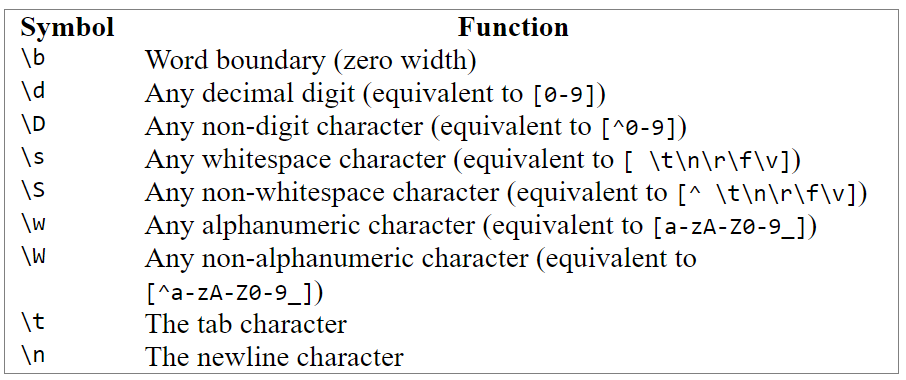

In [116]:
from IPython.display import Image
Image("regular expression symbols NLTK.PNG", width=400, height=400)

Regular expressions are very useful but it can become extremely hard to manage and decipher. Thus in many scenarios, we can also tokenize using existing functions in NLTK as well. First, let's tokenize by sentences. Below we have two examples. Notice that when you tokenize by sentences, the period itself is not necessarily the delimiter. If you have space between the period and the next alphabet, then it's usually an indication that a sentence is complete, and we can call it a sentence. However, if you have something like B.F.F. which are abbreviations, in between which there is no space, NLTK treats it as one word. 

In [118]:
mytext2="""Hello Mr. Smith, \n\nhow are you doing today? The weather is great, and city is awesome. The sky is pinkish-blue. You shouldn't stay home watching TV. \n Do you like my idea? If you do, send me an email! \rYou are always in my prayers. \n\rB.F.F. Paul R. Richter 


Feb 14, 2009"""
print(mytext2)

Hello Mr. Smith, 

how are you doing today? The weather is great, and city is awesome. The sky is pinkish-blue. You shouldn't stay home watching TV. 
You are always in my prayers. 
B.F.F. Paul R. Richter 


Feb 14, 2009


In [120]:
tokenized_text1=sent_tokenize(mytext1)
print(tokenized_text1)

['Hello,\n\n  My name is John Doe, and I have question related to your product.', 'Can you give me a call at the number below?', 'Your help is much appreciated!!', 'Yours, \r\n John Doe \n M.B.A, PhD \n\r Tel: 312-985-3343 \n\r John.Doe@greatcorp.com']


In [122]:
tokenized_text2=sent_tokenize(mytext2)
print(tokenized_text2)

['Hello Mr. Smith, \n\nhow are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't stay home watching TV.", 'Do you like my idea?', 'If you do, send me an email!', 'You are always in my prayers.', 'B.F.F.', 'Paul R. Richter \n\n\nFeb 14, 2009']


We can tokenize by words as well, as below. Notice that when we tokenize by words, those newline marks and carriage return marks disappeared. And abbreviations such as B.F.F. or M.B.A. are treated as one word:

In [124]:
tokenized_text3=word_tokenize(mytext1)
print(tokenized_text3)

['Hello', ',', 'My', 'name', 'is', 'John', 'Doe', ',', 'and', 'I', 'have', 'question', 'related', 'to', 'your', 'product', '.', 'Can', 'you', 'give', 'me', 'a', 'call', 'at', 'the', 'number', 'below', '?', 'Your', 'help', 'is', 'much', 'appreciated', '!', '!', 'Yours', ',', 'John', 'Doe', 'M.B.A', ',', 'PhD', 'Tel', ':', '312-985-3343', 'John.Doe', '@', 'greatcorp.com']


In [126]:
tokenized_text4=word_tokenize(mytext2)
print(tokenized_text4)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'stay', 'home', 'watching', 'TV', '.', 'Do', 'you', 'like', 'my', 'idea', '?', 'If', 'you', 'do', ',', 'send', 'me', 'an', 'email', '!', 'You', 'are', 'always', 'in', 'my', 'prayers', '.', 'B.F.F', '.', 'Paul', 'R.', 'Richter', 'Feb', '14', ',', '2009']


Another way to do is through the blankline_tokenize() method. This is often used to split paragraphs. Notice that the blankline_tokenize() method treats \n\n as its default delimiter. But \r\n and \n\r are not:

In [128]:
tokenized_text5=blankline_tokenize(mytext1)
print(tokenized_text5)

['Hello,', 'My name is John Doe, and I have question related to your product. Can you give me a call at the number below? Your help is much appreciated!!', 'Yours, \r\n John Doe \n M.B.A, PhD \n\r Tel: 312-985-3343 \n\r John.Doe@greatcorp.com']


In [130]:
tokenized_text6=blankline_tokenize(mytext2)
print(tokenized_text6)

['Hello Mr. Smith,', "how are you doing today? The weather is great, and city is awesome. The sky is pinkish-blue. You shouldn't stay home watching TV. \n Do you like my idea? If you do, send me an email! \rYou are always in my prayers. \n\rB.F.F. Paul R. Richter", 'Feb 14, 2009']


Tokenization is more than than what we have shown above. In some cases, we may need to look at phrases or ngrams. Here we will use bigrams and trigrams as examples. To achieve tokenization by ngrams, we can first tokenize by words. And then use the ngram() method from nltk.utils package to create a generator. And then we turn that generator into a list by the list() function:

In [132]:
bigrams = ngrams(tokenized_text3, 2)
trigrams= ngrams(tokenized_text3, 3)
print(list(bigrams), '\n------------------------\n')
print(list(trigrams))

[('Hello', ','), (',', 'My'), ('My', 'name'), ('name', 'is'), ('is', 'John'), ('John', 'Doe'), ('Doe', ','), (',', 'and'), ('and', 'I'), ('I', 'have'), ('have', 'question'), ('question', 'related'), ('related', 'to'), ('to', 'your'), ('your', 'product'), ('product', '.'), ('.', 'Can'), ('Can', 'you'), ('you', 'give'), ('give', 'me'), ('me', 'a'), ('a', 'call'), ('call', 'at'), ('at', 'the'), ('the', 'number'), ('number', 'below'), ('below', '?'), ('?', 'Your'), ('Your', 'help'), ('help', 'is'), ('is', 'much'), ('much', 'appreciated'), ('appreciated', '!'), ('!', '!'), ('!', 'Yours'), ('Yours', ','), (',', 'John'), ('John', 'Doe'), ('Doe', 'M.B.A'), ('M.B.A', ','), (',', 'PhD'), ('PhD', 'Tel'), ('Tel', ':'), (':', '312-985-3343'), ('312-985-3343', 'John.Doe'), ('John.Doe', '@'), ('@', 'greatcorp.com')] 
------------------------

[('Hello', ',', 'My'), (',', 'My', 'name'), ('My', 'name', 'is'), ('name', 'is', 'John'), ('is', 'John', 'Doe'), ('John', 'Doe', ','), ('Doe', ',', 'and'), (','

### III. Finding Words Patterns and Frequencies


Let's now study word frequencies. To achieve that, we usually need to do word tokenization first. But to extract information, we often need to take out some junk information. This includes steps of normalizing the texts, removing punctuations, removing numerals, removing leading and trailing blanks, and stopwords etc., so let's use the wine review again as an example and do some text mining. For this example, we only focus on mining insights from unigrams. 

First let's create the two datasets. The first one is all reviews for Italian wines, and the second is all German wines. 

In [134]:
Italian_text = " ".join(review for review in df[df['country']=='Italy'].description)
German_text = " ".join(review for review in df[df['country']=='Germany'].description)

rm_punkt = string.punctuation # getting all the punctuations
rm_punkt_list=[l for l in rm_punkt]  # turnning the collection of punctuations into a list

stopwords = set(STOPWORDS) # creating the stopword list and later adding more words for exclusion
stopwords.update({"drink", "now", "wine", "flavor", "flavors", "'s", "alongside", "finish", "long", "yet", "it"})

rmlist=rm_punkt_list + list(stopwords)

Italian_text1=word_tokenize(Italian_text) 
German_text1=word_tokenize(German_text)

Italian_text2=[l.strip() for l in Italian_text1] # removing trailing and leading blanks
German_text2=[l.strip() for l in German_text1] # removing trailing and leading blanks

Italian_text3=[l.lower() for l in Italian_text2 if (l.lower() not in rmlist) & (l.isalpha())]  # removing numerals and stopwords
German_text3=[l.lower() for l in German_text2 if (l.lower() not in rmlist) & (l.isalpha())] # removing numerals and stopwords

Now we have got clean lists for these tokens. Let's compute the token frequency:

<FreqDist with 9221 samples and 467864 outcomes>
[('aromas', 12596), ('palate', 10736), ('cherry', 8106), ('fruit', 7646), ('tannins', 7462), ('offers', 6230), ('black', 6183), ('spice', 5362), ('acidity', 4816), ('white', 4758), ('berry', 4378), ('red', 3952), ('ripe', 3902), ('opens', 3891), ('bright', 3578), ('fresh', 3177), ('note', 3143), ('dried', 3041), ('notes', 3024), ('delivers', 3011), ('pepper', 2766), ('leather', 2463), ('nose', 2443), ('firm', 2440), ('licorice', 2419)]


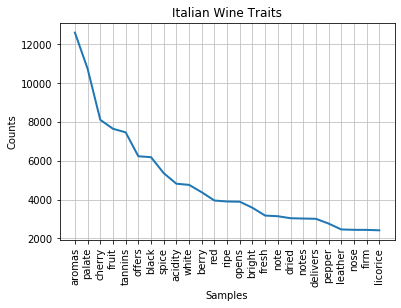

In [136]:
fdist1 = FreqDist(Italian_text3)
print(fdist1)
print(fdist1.most_common(25))

fdist1.plot(25, cumulative=False, title='Italian Wine Traits')
plt.show()

<FreqDist with 3555 samples and 48441 outcomes>
[('palate', 965), ('acidity', 957), ('riesling', 919), ('notes', 689), ('peach', 645), ('dry', 578), ('sweet', 508), ('mineral', 486), ('fresh', 467), ('lime', 454), ('tangerine', 449), ('ripe', 438), ('lemon', 430), ('fruit', 406), ('honey', 384), ('apple', 383), ('nose', 340), ('fruity', 303), ('aromas', 297), ('lend', 291), ('juicy', 286), ('white', 285), ('crisp', 283), ('style', 280), ('grapefruit', 278)]


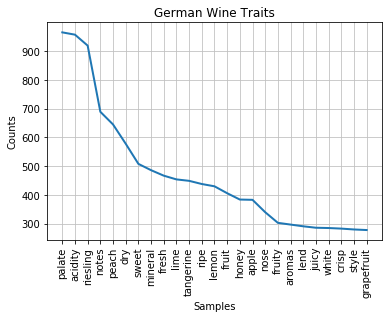

In [138]:
fdist2 = FreqDist(German_text3)
print(fdist2)
print(fdist2.most_common(25))

fdist2.plot(25, cumulative=False, title='German Wine Traits')
plt.show()

Notice that we have the most of the words picked out as we expected. However, there are certain words that we are more interested in than others. For example, we certainly care more about nouns and adjectives when it comes to description of wine tasting. So we need to get rid of the unnecessary verbs and other types of words. Fortunately, this can also be done via **part-of-speech tagging**.

The primary target of part-of-speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a noun, pronoun, adjective, verb, etc. based on the context. POS tagging looks for relationships within the sentence and assigns a corresponding tag to the word. Below is an example (we need to download the 'average_perceptron_tagger' and 'universal_tagset' first). The step of tagging happens after we tokenize by words:

In [140]:
# nltk.download('averaged_perceptron_tagger')
# nltk.download('universal_tagset')
mysent = "Albert Einstein was born in Ulm, Germany in 1879."
t=nltk.word_tokenize(mysent)
nltk.pos_tag(t, tagset='universal')

[('Albert', 'NOUN'),
 ('Einstein', 'NOUN'),
 ('was', 'VERB'),
 ('born', 'VERB'),
 ('in', 'ADP'),
 ('Ulm', 'NOUN'),
 (',', '.'),
 ('Germany', 'NOUN'),
 ('in', 'ADP'),
 ('1879', 'NUM'),
 ('.', '.')]

Now let's create tags for the original tokens (not the tokens we obtained after removing all the stopwords and punctuations etc. because the determination of the POS tags may depend on the context). If the texts are long, POS tagging can take a while. After we have created the tagging, we will need to find the intersection of the existing list with the tagged list where the POS only includes noun, adjective, and adverb:

In [142]:
Italian_POS=nltk.pos_tag(Italian_text2, tagset='universal') # this creates a list
German_POS=nltk.pos_tag(German_text2, tagset='universal') # this creates a list

print(Italian_POS[0:10])
print(German_POS[0:10])

[('Aromas', 'NOUN'), ('include', 'VERB'), ('tropical', 'ADJ'), ('fruit', 'NOUN'), (',', '.'), ('broom', 'NOUN'), (',', '.'), ('brimstone', 'NOUN'), ('and', 'CONJ'), ('dried', 'VERB')]
[('Savory', 'NOUN'), ('dried', 'VERB'), ('thyme', 'ADJ'), ('notes', 'NOUN'), ('accent', 'ADJ'), ('sunnier', 'ADJ'), ('flavors', 'NOUN'), ('of', 'ADP'), ('preserved', 'ADJ'), ('peach', 'NOUN')]


In [144]:
Italy_real=[v[0] for v in Italian_POS if any(x in v[1] for x in ['NOUN', 'ADJ', 'ADV'])] # extracting only noun, adjective and adverb
Germany_real=[v[0] for v in German_POS if any(x in v[1] for x in ['NOUN', 'ADJ', 'ADV'])]

Italian_text4=[l.lower() for l in Italy_real if l.lower() not in rmlist]
German_text4=[l.lower() for l in Germany_real if l.lower() not in rmlist]   

Now we can calculate the word frequencies again, after removing all the words that are not nouns, adjectives or adverbs. Notice that if you compare fdist1 with fdist3, the word "opens" is gone, because it's tagged as a verb:

<FreqDist with 9437 samples and 405096 outcomes>
[('aromas', 11769), ('palate', 10715), ('cherry', 8019), ('fruit', 7636), ('tannins', 7111), ('black', 6183), ('spice', 5356), ('acidity', 4816), ('white', 4758), ('berry', 4337), ('offers', 3885), ('red', 3780), ('bright', 3451), ('ripe', 3357), ('fresh', 3171), ('note', 3140), ('notes', 3020), ('pepper', 2678), ('leather', 2460), ('nose', 2440), ('firm', 2435), ('licorice', 2415), ('delivers', 2396), ('flower', 2375), ('hint', 2315)]


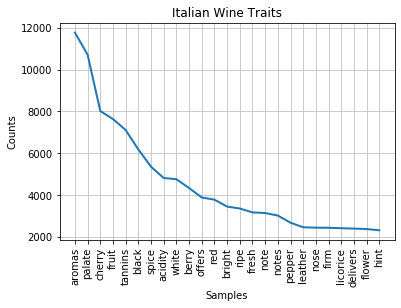

In [146]:
fdist3 = FreqDist(Italian_text4)
print(fdist3)
print(fdist3.most_common(25))

fdist3.plot(25, cumulative=False, title='Italian Wine Traits')
plt.show()

<FreqDist with 3312 samples and 42686 outcomes>
[('palate', 959), ('acidity', 957), ('riesling', 815), ('notes', 685), ('peach', 645), ('dry', 576), ('mineral', 485), ('sweet', 482), ('fresh', 457), ('lime', 453), ('tangerine', 446), ('lemon', 429), ('fruit', 406), ('ripe', 403), ('apple', 383), ('honey', 382), ('nose', 339), ('fruity', 303), ('off-dry', 296), ('white', 285), ('aromas', 283), ('juicy', 283), ('style', 280), ('grapefruit', 277), ('citrus', 267)]


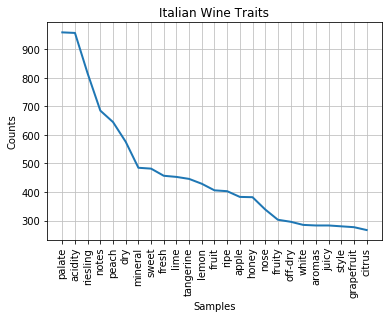

In [148]:
fdist4 = FreqDist(German_text4)
print(fdist4)
print(fdist4.most_common(25))

fdist4.plot(25, cumulative=False, title='Italian Wine Traits')
plt.show()

One cautionary note: when we use POS tagging to further trim down the word list, we need to be careful in many scenarios, as sometimes a word like 'open' can be treated as either verb or adjective. So putting POS into consideration has benefits but it may also increase risk of miscalculation. 

### IV. Stemming and Lemmatization

In some cases, normalizing the texts is more than simply turning everything into lower case, removing punctuations, stopwords, certain types of words based on POS etc. We also need to strip off any affixes, a task known as **stemming**. A further step is to make sure that the resulting form is a known word in a dictionary, a task known as **lemmatization**. We discuss each of these in turn. First, let's use a simple example:

In [150]:
raw2 = """DENNIS: Listen, strange women lying in ponds distributing swords
          is no basis for a system of government.  Supreme executive power derives from
          a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw2)
print(tokens)

['DENNIS', ':', 'Listen', ',', 'strange', 'women', 'lying', 'in', 'ponds', 'distributing', 'swords', 'is', 'no', 'basis', 'for', 'a', 'system', 'of', 'government', '.', 'Supreme', 'executive', 'power', 'derives', 'from', 'a', 'mandate', 'from', 'the', 'masses', ',', 'not', 'from', 'some', 'farcical', 'aquatic', 'ceremony', '.']


NLTK includes several off-the-shelf stemmers, and if you ever need a stemmer you should use one of these in preference to crafting your own using regular expressions, since these handle a wide range of irregular cases. The Porter and Lancaster stemmers follow their own rules for stripping affixes. Observe that the Porter stemmer correctly handles the word lying (mapping it to lie), while the Lancaster stemmer does not:

In [151]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

porter_list=[porter.stem(t) for t in tokens]
lancaster_list=[lancaster.stem(t) for t in tokens]

print(porter_list)
print('\n')
print(lancaster_list)

['denni', ':', 'listen', ',', 'strang', 'women', 'lie', 'in', 'pond', 'distribut', 'sword', 'is', 'no', 'basi', 'for', 'a', 'system', 'of', 'govern', '.', 'suprem', 'execut', 'power', 'deriv', 'from', 'a', 'mandat', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcic', 'aquat', 'ceremoni', '.']


['den', ':', 'list', ',', 'strange', 'wom', 'lying', 'in', 'pond', 'distribut', 'sword', 'is', 'no', 'bas', 'for', 'a', 'system', 'of', 'govern', '.', 'suprem', 'execut', 'pow', 'der', 'from', 'a', 'mand', 'from', 'the', 'mass', ',', 'not', 'from', 'som', 'farc', 'aqu', 'ceremony', '.']


Stemming is not a well-defined process (e.g. the token 'distribut' wasn't picked up correctly in form) and we typically pick the stemmer that best suits the application we have in mind. The Porter Stemmer is a good choice if you are indexing some texts and want to support search using alternative forms of words. Lemmatization is slight better. Below is an example. The WordNet lemmatizer only removes affixes if the resulting word is in its dictionary. This additional checking process makes the lemmatizer slower than the above stemmers. Notice that it doesn't handle 'lying' well, but it converts 'women' to 'woman':

In [152]:
wnl = nltk.WordNetLemmatizer()
wnl_list=[wnl.lemmatize(t) for t in tokens]
print(wnl_list)

['DENNIS', ':', 'Listen', ',', 'strange', 'woman', 'lying', 'in', 'pond', 'distributing', 'sword', 'is', 'no', 'basis', 'for', 'a', 'system', 'of', 'government', '.', 'Supreme', 'executive', 'power', 'derives', 'from', 'a', 'mandate', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcical', 'aquatic', 'ceremony', '.']


The WordNet lemmatizer is a good choice if you want to compile the vocabulary of some texts and want a list of valid lemmas (or lexicon headwords). Keep in mind that not all data cleaning requires stemming or lemmatization, both of which are actually still active research area. Also keep in mind that before we do these things, it's always better to work on the original token after word-tokenization. 

#### References:

##### From Tutorials:
   - https://www.datacamp.com/community/tutorials/wordcloud-python
   - https://www.winemag.com/?s=&drink_type=wine
   - https://stackoverflow.com/questions/10393157/splitting-a-string-with-multiple-delimiters-in-python
   - https://matplotlib.org/gallery/images_contours_and_fields/interpolation_methods.html
   - https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
   - https://stackoverflow.com/questions/17531684/n-grams-in-python-four-five-six-grams
   - https://stackoverflow.com/questions/3389574/check-if-multiple-strings-exist-in-another-string
   - https://www.geeksforgeeks.org/python-ways-to-remove-duplicates-from-list/ 
   
##### From Book Chapters:  
   - https://www.nltk.org/book/ch01.html
   - https://www.nltk.org/book/ch03.html
   - https://www.nltk.org/book/ch05.html